In [1]:
import numpy as np
import matplotlib.pyplot as plt
from edibles import PYTHONDIR
from astropy.modeling.functional_models import Voigt1D
import copy
from stackingFunctions import widthNormLinStacker
from stackingFunctions import stackCheck
from peakBasedFunctions import voigtUniPeak

C:\Users\hkhan\AppData\Local\Temp\ipykernel_4004\969147885.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


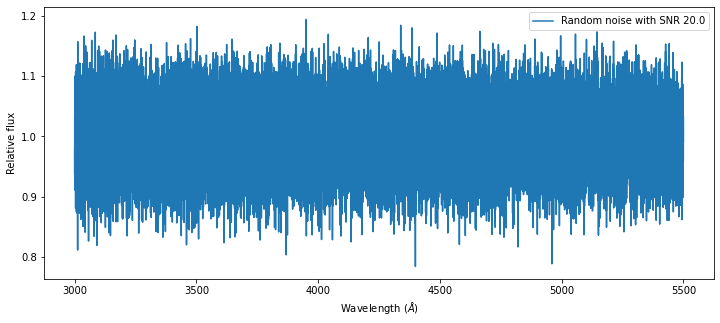

In [2]:
SNR = 20.0
signal = 1.0
minWave = 3000.0
maxWave = 5500.0

reso = 70000.0

currX = minWave
x = np.array([minWave])

while currX < maxWave:
    currX = currX + currX/reso
    x = np.append(x, currX)

#x = np.linspace(3000.0, 5500.0, 100000)
y = np.random.normal(signal, 1/SNR, x.shape)

fig1, ax1 = plt.subplots(figsize = (12,5))

ax1.plot(x, y, label = 'Random noise with SNR ' + str(SNR))
ax1.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Relative flux')
ax1.legend()
#plt.close(fig1)
fig1.show()
#plt.close(fig1)

In [3]:
print(np.std(y))

0.05013314101415703


In [4]:
#select molecule as follows -
# 2-Methylnaphthalene -> 1
# Acenaphthene -> 2
# Benzo[ghi]perylene -> 3
# Pentacene -> 4
# Perylene -> 5
# Phenanthrene -> 6
# Pyrene -> 7
# Phenalenyl -> 8
# Any other molecule -> 0 and input the molecule name (according to parameters file)
moleculeNo = 5

#getting molecule name from given molecule number above
#if on jupyter, just run this part

if moleculeNo == 1:
    molName = '2MethylNaphthalene'
elif moleculeNo == 2:
    molName = 'Acenaphthene'
elif moleculeNo == 3:
    molName = 'Benzoghiperylene'
elif moleculeNo == 4:
    molName = 'Pentacene'
elif moleculeNo == 5:
    molName = 'Perylene'
elif moleculeNo == 6:
    molName = 'Phenanthrene'
elif moleculeNo == 7:
    molName = 'Pyrene'
elif moleculeNo == 8:
    molName = 'Phenalenyl'
elif moleculeNo == 0:
    molName = input('Enter molecule file name (as in parameters file):\n')

In [5]:
#loading the parameters of the given molecule
#if on jupyter, just run this part

paramFile = PYTHONDIR + '\\utils\\Harshit\\Lab Spectra Parameters\\' + molName + 'Params.txt'
molParam = np.loadtxt(paramFile)
P = molParam.shape[0]

In [6]:
print(molParam)

[[4.02235681e+03 4.34036168e-01]
 [4.02505177e+03 3.26686765e-01]
 [4.03015492e+03 4.90781127e-01]
 [4.03349402e+03 4.69368559e-01]
 [4.03709484e+03 4.41464164e-01]
 [4.05552444e+03 4.99026296e-01]
 [4.05893434e+03 4.48412083e-01]
 [4.06265237e+03 4.50312024e-01]
 [4.07194068e+03 4.58866147e-01]
 [4.07561299e+03 4.37818883e-01]
 [4.07939020e+03 5.49952214e-01]
 [4.08304284e+03 4.19109290e-01]
 [4.08501216e+03 4.94871733e-01]
 [4.08819720e+03 4.97875484e-01]
 [4.09158174e+03 5.18710439e-01]
 [4.09528594e+03 5.18874714e-01]
 [4.09691136e+03 5.26495020e-01]
 [4.10370771e+03 1.17053680e+00]
 [4.12741027e+03 5.58102760e-01]
 [4.13102003e+03 4.76948755e-01]
 [4.13472908e+03 4.38845552e-01]
 [4.13890299e+03 4.93379602e-01]
 [4.14130893e+03 3.49239443e-01]
 [4.14440561e+03 4.54555236e-01]
 [4.14772121e+03 5.02699177e-01]
 [4.15125899e+03 5.51285273e-01]
 [4.15301500e+03 4.45475846e-01]
 [4.15517166e+03 5.73354943e-01]
 [4.15692542e+03 5.52295105e-01]
 [4.15997580e+03 1.02062269e+00]
 [4.163906

In [7]:
"""
x1 = np.linspace(-5, 5, 100)
fwhm = 1
fL = 2*fwhm/3.6013
fG = 2.355*fwhm/3.6013
v1 = Voigt1D(x_0 = 3, fwhm_L = fL, fwhm_G = fG)
y1 = v1(x1)/0.6556557489878598
print(v1(3))

plt.plot(x1, y1, label = 'Voigt test')
plt.legend()
"""

"\nx1 = np.linspace(-5, 5, 100)\nfwhm = 1\nfL = 2*fwhm/3.6013\nfG = 2.355*fwhm/3.6013\nv1 = Voigt1D(x_0 = 3, fwhm_L = fL, fwhm_G = fG)\ny1 = v1(x1)/0.6556557489878598\nprint(v1(3))\n\nplt.plot(x1, y1, label = 'Voigt test')\nplt.legend()\n"

Reduced chi square for voigt fit (iteration 1) is 1.0281870505200759
Reduced chi square for null hypothesis (iteration 1) is 1.7662156521996009
BCI for voigt fit (iteration 1) is 6.379847224624016
BCI for null hypothesis (iteration 1) is 54.86365007723264
Reduced chi square for voigt fit (iteration 2) is 1.1674698502436263
Reduced chi square for null hypothesis (iteration 2) is 1.9232610141293511
BCI for voigt fit (iteration 2) is 19.084025203138285
BCI for null hypothesis (iteration 2) is 63.3819482854837
Reduced chi square for voigt fit (iteration 3) is 1.0924558535659885
Reduced chi square for null hypothesis (iteration 3) is 1.9996384111561902
BCI for voigt fit (iteration 3) is 12.442960454228597
BCI for null hypothesis (iteration 3) is 67.27636624752394
Reduced chi square for voigt fit (iteration 4) is 0.82355572257069
Reduced chi square for null hypothesis (iteration 4) is 1.1577872605258106
BCI for voigt fit (iteration 4) is -15.812270010909335
BCI for null hypothesis (iteration

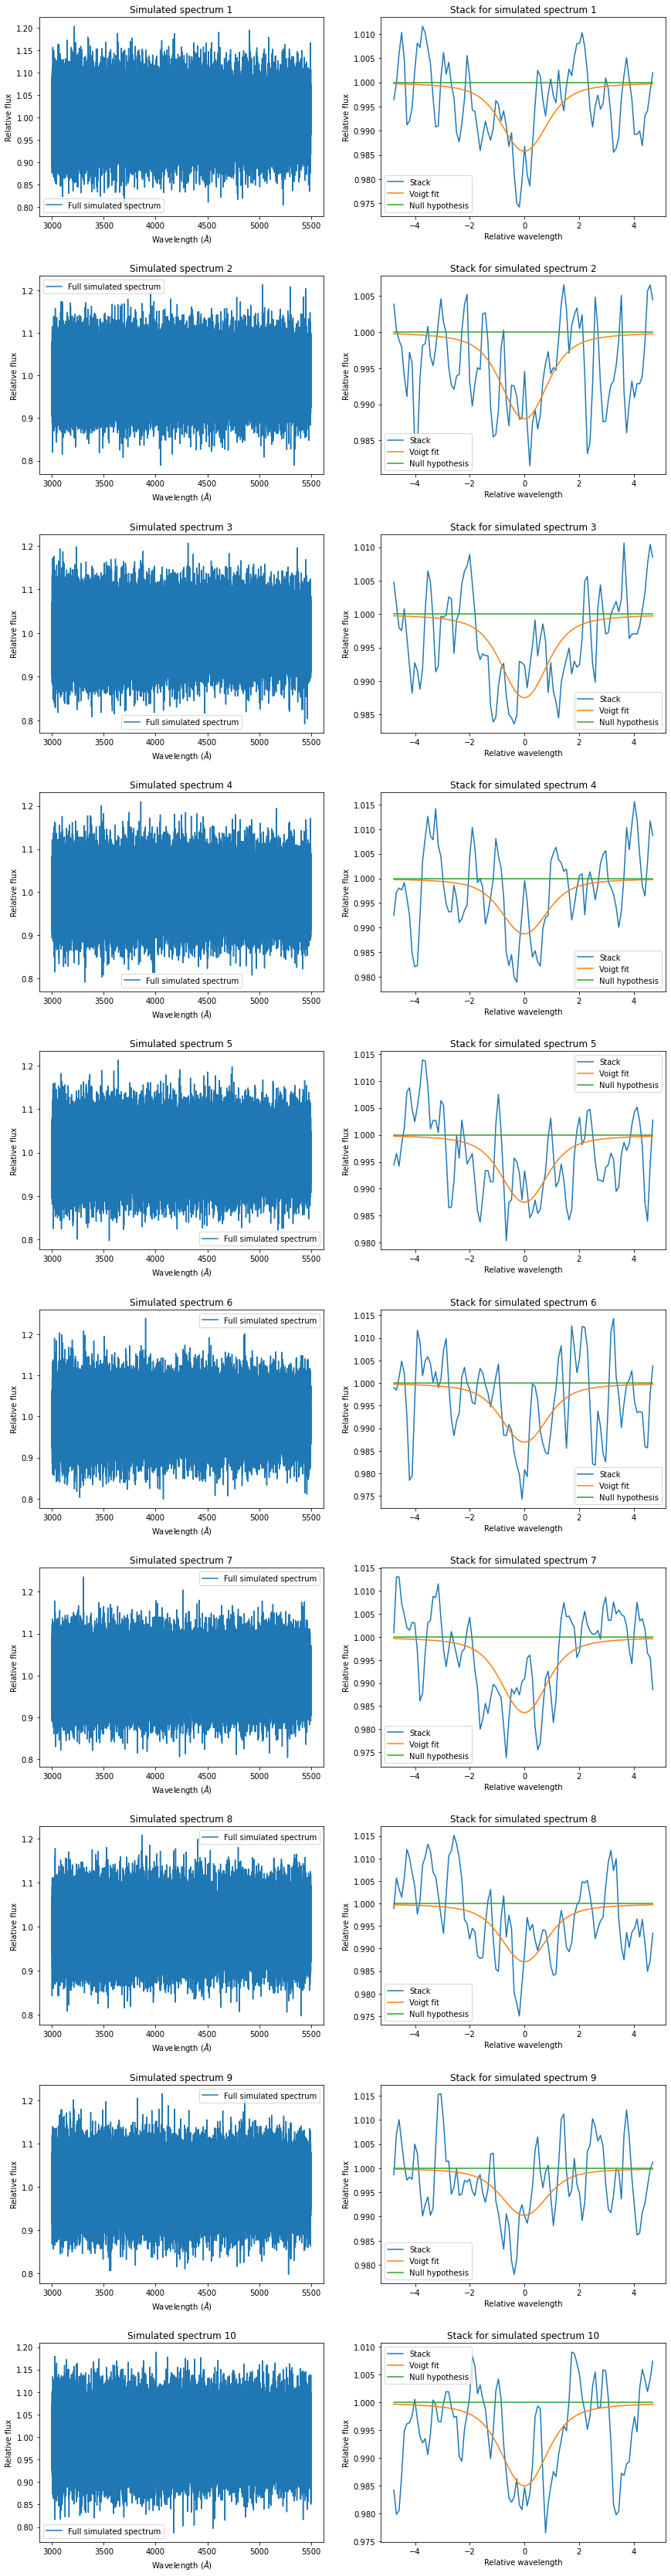

In [8]:
iters = 10

fig2, axs1 = plt.subplots(iters, 2, figsize = (12, 5*iters))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for it2 in range(iters):
    y = np.random.normal(signal, 1/SNR, x.shape)
    
    #strPeak = np.random.randint(P)
    ynew = copy.deepcopy(y)
    
    if(iters < 2):
        desax1 = axs1[0]
        desax2 = axs1[1]
    else:
        desax1 = axs1[it2, 0]
        desax2 = axs1[it2, 1]
    
    for it1 in range(P):
        fwhm1 = molParam[it1, 1]
        fL1 = 2*fwhm1/3.6013
        fG1 = 2.355*fwhm1/3.6013
        v2 = Voigt1D(x_0 = molParam[it1, 0], fwhm_L = fL1, fwhm_G = fG1)
        #print(v2(molParam[it1, 0]))
        """
        if it1 < strPeak:
            curr = np.random.randint(P)
        elif it1 == strPeak:
            curr = P
        else:
            curr = np.random.randint(P+1)
        """
        #curr = np.random.random_sample() #sets all peaks to have random relative depths (max is 1 open)
        curr = 1.0 #sets all peak depths to be equal
        ynew = ynew - 0.01*curr*v2(x)/v2(molParam[it1, 0])

    desax1.plot(x, ynew, label = 'Full simulated spectrum')
    desax1.legend()
    tit1 = 'Simulated spectrum ' + str(it2+1)
    desax1.set_title(tit1)
    desax1.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Relative flux')
    desax1.legend()
    
    data = np.array([x, ynew]).transpose()
    #print(data.shape)
    
    stack = widthNormLinStacker(data, molParam, hide = True, extent = 5)
    
    dict1 = stackCheck(stack, flatReg = [-2.5, 2.5])
    
    res1 = dict1['Voigt model']
    res2 = dict1['Null model']
    rc1 = dict1['Red chi of voigt']
    print('Reduced chi square for voigt fit (iteration ' + str(it2+1) + ') is ' + str(rc1))
    rc2 = dict1['Red chi of null']
    print('Reduced chi square for null hypothesis (iteration ' + str(it2+1) + ') is ' + str(rc2))
    BCI1 = dict1['BCI of voigt']
    print('BCI for voigt fit (iteration ' + str(it2+1) + ') is ' + str(BCI1))
    BCI2 = dict1['BCI of null']
    print('BCI for null hypothesis (iteration ' + str(it2+1) + ') is ' + str(BCI2))
    #lk = dict1['Likelihood']
    #print('Likelihood of it being a detection is ' + str(lk*100) + r'%')
    
    #suppSD = np.std(y)/np.sqrt(P)
    #print('Supposed uncertainity is ' + str(suppSD))
    #calcSD = np.std(stack[np.logical_or(stack[:, 0] > 2.5, stack[:, 0] < -2.5), 1])
    #print('Calculated uncertainity is ' + str(calcSD))
    #res = voigtUniPeak(stack, sd = calcSD, plot = 0, retMod = True, centre = 0.0, sigma = 2/3.6013)
    #print('Reduced chi square for voigt fit (iteration ' + str(it2+1) + ') is ' + str(res.redchi))
    #res2 = voigtUniPeak(stack, sd = calcSD, plot = 0, retMod = True, amp = 0.0)
    #print('Reduced chi square for null hypothesis (iteration ' + str(it2+1) + ') is ' + str(res2.redchi))
    
    #likelihood = np.exp(-res.redchi)/(np.exp(-res.redchi) + np.exp(-res2.redchi))
    #print('Likelihood of it being a detection is ' + str(likelihood*100) + r'%')
    
    desax2.plot(stack[:, 0], stack[:, 1], label = 'Stack')
    desax2.plot(stack[:, 0], (1 - res1.best_fit), label = 'Voigt fit')
    desax2.plot(stack[:, 0], (1 - res2.best_fit), label = 'Null hypothesis')
    desax2.legend()
    tit2 = 'Stack for simulated spectrum ' + str(it2+1)
    desax2.set_title(tit2)
    desax2.set(xlabel = 'Relative wavelength', ylabel = 'Relative flux')
    desax2.legend()

plt.subplots_adjust(hspace=0.3, wspace=0.2)

In [12]:
#check for all SNRs for with spectra with single molecules only

SNRs = [1, 2, 5, 10, 20, 50, 100, 200, 500]
mols = ['2MethylNaphthalene', 'Acenaphthene', 'Benzoghiperylene', 'Pentacene', 'Perylene', 'Phenanthrene', 'Pyrene', 'Phenalenyl']
indIter = 10

avgLk = np.zeros((len(SNRs), len(mols)))

for it5, mol in enumerate(mols):
    parFile = PYTHONDIR + '\\utils\\Harshit\\Lab Spectra Parameters\\' + molName + 'Params.txt'
    molPar = np.loadtxt(parFile)
    peaks = molPar.shape[0]
    for it6, snr in enumerate(SNRs):
        for it3 in range(indIter):
            y = np.random.normal(signal, 1/snr, x.shape)
            ynew = copy.deepcopy(y)
            for it4 in range(peaks):
                fwhm = molPar[it4, 1]
                fL = 2*fwhm/3.6013
                fG = 2.355*fwhm/3.6013
                voi = Voigt1D(x_0 = molPar[it4, 0], fwhm_L = fL, fwhm_G = fG)
                ynew = ynew - 0.01*voi(x)/voi(molPar[it4, 0])
            
            data = np.array([x, ynew]).transpose()
            stack = widthNormLinStacker(data, molParam, hide = True, extent = 5)
            dict2 = stackCheck(stack, flatReg = [-2.5, 2.5], retMods = False)
            like = dict2['Likelihood']
            avgLk[it6, it5] = avgLk[it6, it5] + like/indIter
            print('Doing mol ' + str(it5) + ', SNR ' + str(it6))

Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 5
Doing mol 0, SNR 5
Doing mol 0,

Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 3
Doing mol 5, SNR 3
Doing mol 5, SNR 3
Doing mol 5, SNR 3
Doing mol 5,

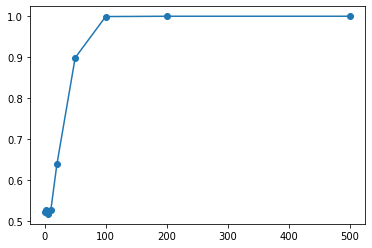

In [13]:
plt.plot(SNRs, avgLk[:, 4], 'o-')

In [14]:
print(avgLk[:, 4])

[0.52326267 0.52852197 0.51820417 0.52657826 0.63897745 0.89882884
 0.99922851 1.         1.        ]


In [15]:
#check for all SNRs for with spectra with single molecules only

SNRs = [10, 12, 14, 16, 20]
mols = ['2MethylNaphthalene', 'Acenaphthene', 'Benzoghiperylene', 'Pentacene', 'Perylene', 'Phenanthrene', 'Pyrene', 'Phenalenyl']
indIter = 20

fails = np.zeros((len(SNRs), len(mols)))

for it7, mol in enumerate(mols):
    parFile = PYTHONDIR + '\\utils\\Harshit\\Lab Spectra Parameters\\' + molName + 'Params.txt'
    molPar = np.loadtxt(parFile)
    peaks = molPar.shape[0]
    for it8, snr in enumerate(SNRs):
        for it9 in range(indIter):
            y = np.random.normal(signal, 1/snr, x.shape)
            ynew = copy.deepcopy(y)
            for it10 in range(peaks):
                fwhm = molPar[it10, 1]
                fL = 2*fwhm/3.6013
                fG = 2.355*fwhm/3.6013
                voi = Voigt1D(x_0 = molPar[it10, 0], fwhm_L = fL, fwhm_G = fG)
                ynew = ynew - 0.01*voi(x)/voi(molPar[it10, 0])
            
            data = np.array([x, ynew]).transpose()
            stack = widthNormLinStacker(data, molParam, hide = True, extent = 5)
            dict2 = stackCheck(stack, flatReg = [-2.5, 2.5], retMods = False)
            bic1 = dict2['BCI of voigt']
            bic2 = dict2['BCI of null']
            fails[it8, it7] = fails[it8, it7] + int(bic2 > bic1)
            print('Doing mol ' + str(it7) + ', SNR ' + str(it8) + ', iteration ' + str(it9))

Doing mol 0, SNR 0, iteration 0
Doing mol 0, SNR 0, iteration 1
Doing mol 0, SNR 0, iteration 2
Doing mol 0, SNR 0, iteration 3
Doing mol 0, SNR 0, iteration 4
Doing mol 0, SNR 0, iteration 5
Doing mol 0, SNR 0, iteration 6
Doing mol 0, SNR 0, iteration 7
Doing mol 0, SNR 0, iteration 8
Doing mol 0, SNR 0, iteration 9
Doing mol 0, SNR 0, iteration 10
Doing mol 0, SNR 0, iteration 11
Doing mol 0, SNR 0, iteration 12
Doing mol 0, SNR 0, iteration 13
Doing mol 0, SNR 0, iteration 14
Doing mol 0, SNR 0, iteration 15
Doing mol 0, SNR 0, iteration 16
Doing mol 0, SNR 0, iteration 17
Doing mol 0, SNR 0, iteration 18
Doing mol 0, SNR 0, iteration 19
Doing mol 0, SNR 1, iteration 0
Doing mol 0, SNR 1, iteration 1
Doing mol 0, SNR 1, iteration 2
Doing mol 0, SNR 1, iteration 3
Doing mol 0, SNR 1, iteration 4
Doing mol 0, SNR 1, iteration 5
Doing mol 0, SNR 1, iteration 6
Doing mol 0, SNR 1, iteration 7
Doing mol 0, SNR 1, iteration 8
Doing mol 0, SNR 1, iteration 9
Doing mol 0, SNR 1, iteration 

Doing mol 2, SNR 2, iteration 13
Doing mol 2, SNR 2, iteration 14
Doing mol 2, SNR 2, iteration 15
Doing mol 2, SNR 2, iteration 16
Doing mol 2, SNR 2, iteration 17
Doing mol 2, SNR 2, iteration 18
Doing mol 2, SNR 2, iteration 19
Doing mol 2, SNR 3, iteration 0
Doing mol 2, SNR 3, iteration 1
Doing mol 2, SNR 3, iteration 2
Doing mol 2, SNR 3, iteration 3
Doing mol 2, SNR 3, iteration 4
Doing mol 2, SNR 3, iteration 5
Doing mol 2, SNR 3, iteration 6
Doing mol 2, SNR 3, iteration 7
Doing mol 2, SNR 3, iteration 8
Doing mol 2, SNR 3, iteration 9
Doing mol 2, SNR 3, iteration 10
Doing mol 2, SNR 3, iteration 11
Doing mol 2, SNR 3, iteration 12
Doing mol 2, SNR 3, iteration 13
Doing mol 2, SNR 3, iteration 14
Doing mol 2, SNR 3, iteration 15
Doing mol 2, SNR 3, iteration 16
Doing mol 2, SNR 3, iteration 17
Doing mol 2, SNR 3, iteration 18
Doing mol 2, SNR 3, iteration 19
Doing mol 2, SNR 4, iteration 0
Doing mol 2, SNR 4, iteration 1
Doing mol 2, SNR 4, iteration 2
Doing mol 2, SNR 4, ite

Doing mol 5, SNR 0, iteration 6
Doing mol 5, SNR 0, iteration 7
Doing mol 5, SNR 0, iteration 8
Doing mol 5, SNR 0, iteration 9
Doing mol 5, SNR 0, iteration 10
Doing mol 5, SNR 0, iteration 11
Doing mol 5, SNR 0, iteration 12
Doing mol 5, SNR 0, iteration 13
Doing mol 5, SNR 0, iteration 14
Doing mol 5, SNR 0, iteration 15
Doing mol 5, SNR 0, iteration 16
Doing mol 5, SNR 0, iteration 17
Doing mol 5, SNR 0, iteration 18
Doing mol 5, SNR 0, iteration 19
Doing mol 5, SNR 1, iteration 0
Doing mol 5, SNR 1, iteration 1
Doing mol 5, SNR 1, iteration 2
Doing mol 5, SNR 1, iteration 3
Doing mol 5, SNR 1, iteration 4
Doing mol 5, SNR 1, iteration 5
Doing mol 5, SNR 1, iteration 6
Doing mol 5, SNR 1, iteration 7
Doing mol 5, SNR 1, iteration 8
Doing mol 5, SNR 1, iteration 9
Doing mol 5, SNR 1, iteration 10
Doing mol 5, SNR 1, iteration 11
Doing mol 5, SNR 1, iteration 12
Doing mol 5, SNR 1, iteration 13
Doing mol 5, SNR 1, iteration 14
Doing mol 5, SNR 1, iteration 15
Doing mol 5, SNR 1, iter

Doing mol 7, SNR 2, iteration 19
Doing mol 7, SNR 3, iteration 0
Doing mol 7, SNR 3, iteration 1
Doing mol 7, SNR 3, iteration 2
Doing mol 7, SNR 3, iteration 3
Doing mol 7, SNR 3, iteration 4
Doing mol 7, SNR 3, iteration 5
Doing mol 7, SNR 3, iteration 6
Doing mol 7, SNR 3, iteration 7
Doing mol 7, SNR 3, iteration 8
Doing mol 7, SNR 3, iteration 9
Doing mol 7, SNR 3, iteration 10
Doing mol 7, SNR 3, iteration 11
Doing mol 7, SNR 3, iteration 12
Doing mol 7, SNR 3, iteration 13
Doing mol 7, SNR 3, iteration 14
Doing mol 7, SNR 3, iteration 15
Doing mol 7, SNR 3, iteration 16
Doing mol 7, SNR 3, iteration 17
Doing mol 7, SNR 3, iteration 18
Doing mol 7, SNR 3, iteration 19
Doing mol 7, SNR 4, iteration 0
Doing mol 7, SNR 4, iteration 1
Doing mol 7, SNR 4, iteration 2
Doing mol 7, SNR 4, iteration 3
Doing mol 7, SNR 4, iteration 4
Doing mol 7, SNR 4, iteration 5
Doing mol 7, SNR 4, iteration 6
Doing mol 7, SNR 4, iteration 7
Doing mol 7, SNR 4, iteration 8
Doing mol 7, SNR 4, iteration

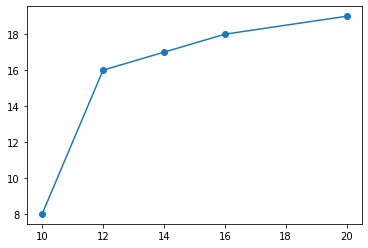

In [17]:
plt.plot(SNRs, fails[:, 5], 'o-')

In [18]:
fails

array([[10., 17., 10., 13., 17.,  8., 13.,  8.],
       [17., 14., 14., 15., 15., 16., 16., 17.],
       [17., 16., 14., 17., 15., 17., 13., 14.],
       [18., 17., 19., 17., 18., 18., 17., 20.],
       [18., 19., 19., 20., 19., 19., 19., 19.]])

In [22]:
np.sum(fails, axis = 1)/(len(mols)*indIter)

array([0.6    , 0.775  , 0.76875, 0.9    , 0.95   ])